In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
# 使用GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
! nvidia-smi

Tue Aug  2 15:43:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 73%   83C    P2   167W / 260W |   5339MiB / 11019MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 32%   

# MongoDB

In [4]:
from pymongo import MongoClient
import pymongo

In [5]:
mongoURI = "mongodb://%s:%s@%s/%s?authMechanism=SCRAM-SHA-1" % ("eva", "eva_30241", "140.117.69.70:30241", "eva")

try:
    conn = pymongo.MongoClient(mongoURI)
    db = conn.eva
    # db_de = db.patent_de
    # db_us = db.patent_us
    # db_cn = db.patent_cn

    db_rm_cn_2020 = db.rm_patent_cn_2020
    db_rm_us_2020 = db.rm_patent_us_2020
    db_rm_de_2020 = db.rm_patent_de_2020

    
except errors.ConnectionFailure as err:
    print(err)

# 2020

## Company數量

In [6]:
data_assignee = db_rm_de_2020.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])

In [7]:
df_family_de = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [8]:
data_assignee = db_rm_cn_2020.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_cn = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [9]:
data_assignee = db_rm_us_2020.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_us = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [10]:
# final_df = pd.concat([df_family_de,df_family_cn,df_family_us],axis=0)

### DE

In [11]:
# 取總數前15家公司
df_family_de.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)

,company,count
12,Intel Corp,84
17,Samsung Electronics Co Ltd,28
16,Robert Bosch GmbH,10
0,Apple Inc,5
14,LG Electronics Inc,5
9,Hyundai Mobis Co Ltd,5
27,Vega Grieshaber KG,5
8,Hewlett Packard Enterprise Development LP,4
25,Taiwan Semiconductor Manufacturing Co TSMC Ltd,4
26,Toyota Motor Corp,4


In [12]:
com_de_df = df_family_de.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_de_df.reset_index(drop=True, inplace=True)

In [13]:
com_de_df["count_log"] = com_de_df["count"].apply(lambda x: np.log(x))
com_de_df

,company,count,count_log
0,Intel Corp,84,4.430817
1,Samsung Electronics Co Ltd,28,3.332205
2,Robert Bosch GmbH,10,2.302585
3,Apple Inc,5,1.609438
4,LG Electronics Inc,5,1.609438
5,Hyundai Mobis Co Ltd,5,1.609438
6,Vega Grieshaber KG,5,1.609438
7,Hewlett Packard Enterprise Development LP,4,1.386294
8,Taiwan Semiconductor Manufacturing Co TSMC Ltd,4,1.386294
9,Toyota Motor Corp,4,1.386294


In [14]:
com_de_ls = list(com_de_df.company)

### CN

In [15]:
# 取總數前15家公司
df_family_cn.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)

,company,count
17,Huawei Technologies Co Ltd,339
3,Apple Inc,144
24,Shanghai Langbo Communication Technology Co Ltd,124
23,Samsung Electronics Co Ltd,106
18,Intel Corp,86
10,China United Network Communications Group Co Ltd,70
8,China Mobile Communications Group Co Ltd,62
26,State Grid Corp of China SGCC,60
19,LG Electronics Inc,54
5,Beijing Sankuai Online Technology Co Ltd,51


In [16]:
com_cn_df = df_family_cn.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_cn_df.reset_index(drop=True, inplace=True)

In [17]:
com_cn_df["count_log"] = com_cn_df["count"].apply(lambda x: np.log(x))
com_cn_df

,company,count,count_log
0,Huawei Technologies Co Ltd,339,5.826000
1,Apple Inc,144,4.969813
2,Shanghai Langbo Communication Technology Co Ltd,124,4.820282
3,Samsung Electronics Co Ltd,106,4.663439
4,Intel Corp,86,4.454347
5,China United Network Communications Group Co Ltd,70,4.248495
6,China Mobile Communications Group Co Ltd,62,4.127134
7,State Grid Corp of China SGCC,60,4.094345
8,LG Electronics Inc,54,3.988984
9,Beijing Sankuai Online Technology Co Ltd,51,3.931826


In [18]:
com_cn_ls = list(com_cn_df.company)

### US

In [19]:
# 取總數前15家公司
df_family_us.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)

,company,count
23,Qualcomm Inc,1876
25,Samsung Electronics Co Ltd,662
13,Intel Corp,388
15,LG Electronics Inc,295
14,International Business Machines Corp,225
12,Huawei Technologies Co Ltd,191
18,Micron Technology Inc,154
1,AT&T Intellectual Property I LP,147
5,Cisco Technology Inc,144
29,Verizon Patent and Licensing Inc,128


In [20]:
com_us_df = df_family_us.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_us_df.reset_index(drop=True, inplace=True)

In [21]:
com_us_df["count_log"] = com_us_df["count"].apply(lambda x: np.log(x))
com_us_df

,company,count,count_log
0,Qualcomm Inc,1876,7.536897
1,Samsung Electronics Co Ltd,662,6.495266
2,Intel Corp,388,5.961005
3,LG Electronics Inc,295,5.686975
4,International Business Machines Corp,225,5.416100
5,Huawei Technologies Co Ltd,191,5.252273
6,Micron Technology Inc,154,5.036953
7,AT&T Intellectual Property I LP,147,4.990433
8,Cisco Technology Inc,144,4.969813
9,Verizon Patent and Licensing Inc,128,4.852030


In [22]:
com_us_ls = list(com_us_df.company)

# Data

## CN

In [23]:
ccontry = pd.read_csv("../rm_company_country_cn_2020.csv")
ccpc = pd.read_csv("../rm_company_cpc_cn_2020.csv")

In [24]:
ccontry[ccontry.company.isin(com_cn_ls)]

,company,AR,AU,BR,CA,CH,CN,CO,DE,DK,...,FR,GB,IL,JP,KR,MA,RU,SG,TW,US
27,Alipay Hangzhou Information Technology Co Ltd,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,Apple Inc,0.0,0.0,0.0,0.0,0.0,140.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,4.0
244,Beijing Sankuai Online Technology Co Ltd,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,Beijing Xiaomi Mobile Software Co Ltd,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494,China Mobile Communications Group Co Ltd,0.0,0.0,0.0,0.0,0.0,119.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,China Mobile IoT Co Ltd,0.0,0.0,0.0,0.0,0.0,87.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
526,China United Network Communications Group Co Ltd,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1271,Huawei Technologies Co Ltd,0.0,0.0,0.0,1.0,0.0,338.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1390,Intel Corp,0.0,2.0,3.0,0.0,0.0,86.0,0.0,39.0,0.0,...,0.0,0.0,0.0,13.0,19.0,0.0,0.0,2.0,6.0,60.0
1603,LG Electronics Inc,0.0,0.0,0.0,0.0,0.0,50.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,1.0


### Similarity計算

#### Country

- 換成機率  

In [25]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

#### PBC
- 和Samsung Electronics Co Ltd比較

In [26]:
ccontry_pbc = ccontry2.loc[com_cn_ls,:].copy()
ccontry_pbc.head()

,AR,AU,BR,CA,CH,CN,CO,DE,DK,EP,FR,GB,IL,JP,KR,MA,RU,SG,TW,US
company,,,,,,,,,,,,,,,,,,,,
Huawei Technologies Co Ltd,0.0,0.000000,0.000000,0.002849,0.0,0.962963,0.0,0.000000,0.0,0.017094,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.017094
Apple Inc,0.0,0.000000,0.000000,0.000000,0.0,0.714286,0.0,0.015306,0.0,0.117347,0.0,0.005102,0.0,0.000000,0.127551,0.0,0.0,0.000000,0.000000,0.020408
Shanghai Langbo Communication Technology Co Ltd,0.0,0.000000,0.000000,0.000000,0.0,0.932331,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.067669
Samsung Electronics Co Ltd,0.0,0.000000,0.000000,0.000000,0.0,0.328804,0.0,0.021739,0.0,0.179348,0.0,0.002717,0.0,0.016304,0.222826,0.0,0.0,0.005435,0.005435,0.217391
Intel Corp,0.0,0.008163,0.012245,0.000000,0.0,0.351020,0.0,0.159184,0.0,0.061224,0.0,0.000000,0.0,0.053061,0.077551,0.0,0.0,0.008163,0.024490,0.244898


In [27]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

#### CPC

In [28]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [29]:
ccpc_pbc = ccpc2.loc[com_cn_ls,:].copy()
# ccpc_pbc

In [30]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### Scatter Plot

In [31]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_cn_df.count_log[com_cn_df.company=="Samsung Electronics Co Ltd"].values-com_cn_df.count_log[com_cn_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_cn_df.count_log[com_cn_df.company=="Samsung Electronics Co Ltd"].values-com_cn_df.count_log[com_cn_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

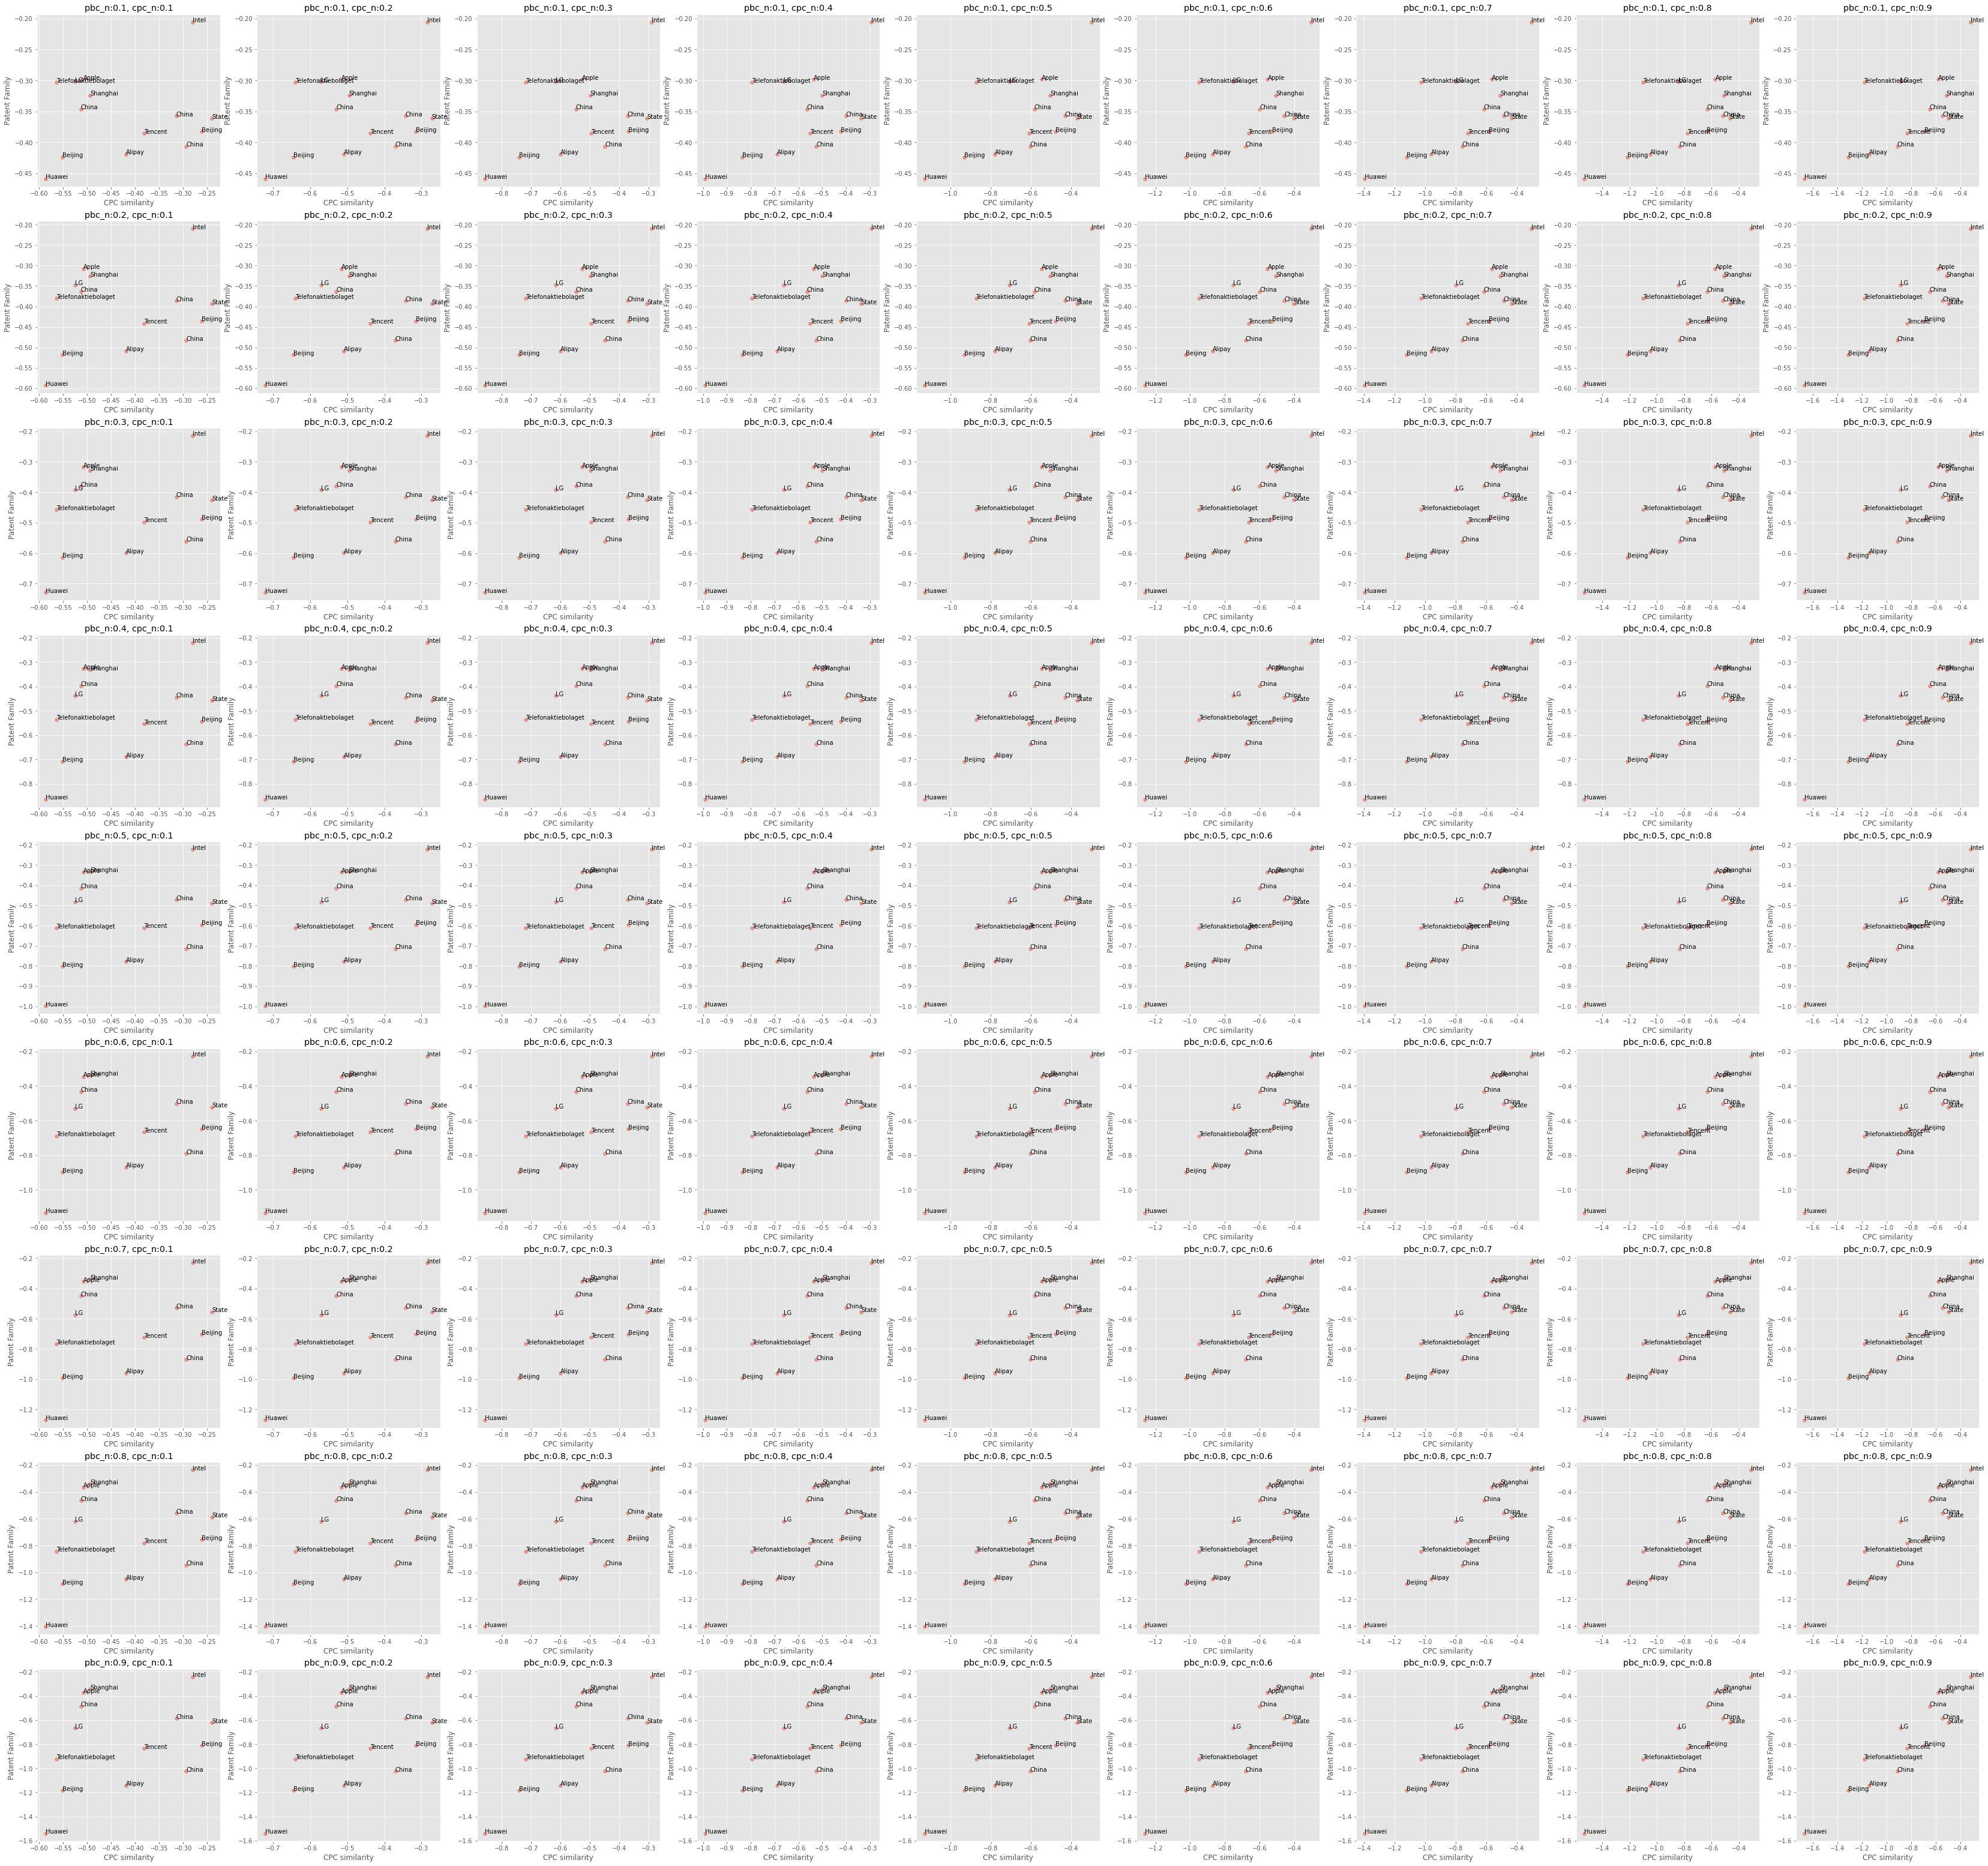

In [32]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_cn_2020_1.png'.format(pbc_n))

In [33]:
c_df

,cpc,country
company,,
Huawei Technologies Co Ltd,1.667583,1.539802
Apple Inc,0.581880,0.373590
Shanghai Langbo Communication Technology Co Ltd,0.512791,0.343405
Intel Corp,0.315138,0.240767
China United Network Communications Group Co Ltd,0.650356,0.483765
China Mobile Communications Group Co Ltd,0.544176,0.587665
State Grid Corp of China SGCC,0.498800,0.620286
LG Electronics Inc,0.889297,0.665837
Beijing Sankuai Online Technology Co Ltd,0.689649,0.810537


In [34]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_cn_2020_2.png'.format(pbc_n))

In [35]:
c_df

,cpc,country
company,,
Huawei Technologies Co Ltd,1.667583,1.539802
Apple Inc,0.581880,0.373590
Shanghai Langbo Communication Technology Co Ltd,0.512791,0.343405
Intel Corp,0.315138,0.240767
China United Network Communications Group Co Ltd,0.650356,0.483765
China Mobile Communications Group Co Ltd,0.544176,0.587665
State Grid Corp of China SGCC,0.498800,0.620286
LG Electronics Inc,0.889297,0.665837
Beijing Sankuai Online Technology Co Ltd,0.689649,0.810537


### Scatter Plot2

In [36]:
c_df = scatter_plot(pbc_n,cpc_n)
c_df = c_df.reset_index()
c_df["company"] = c_df.company.apply(lambda x: x.replace(" Inc","")\
                                                    .replace(" Co Ltd","")\
                                                    .replace(" Co. Ltd.","")\
                                                    .replace(" Co., Ltd.","")\
                                                    .replace(" Ltd","")\
                                                    .replace(" Corp","")\
                                                    .replace("..","")\
                                                    .replace("International Business Machines","IBM")\
                                                    .replace("Nippon Telegraph and Telephone","Nippon Telegraph & Tel")\
                                                    .replace("Alibaba Group Holding Ltd","Alibaba")\
                                                    .replace("ZTE Intelligent IoT Technology","ZTE")\
                                                    .replace("AT&T Intellectual Property I LP","AT&T")\
                                                    .replace("Microsoft Technology Licensing LLC","Microsoft")\
                                                    .replace("Telefonaktiebolaget LM Ericsson AB","Ericsson")\
                                                    .replace("Cisco Technology","Cisco Systems")\
                                                    .replace("Verizon Patent and Licensing","Verizon Communications")\
                                                    .replace("Nokia Technologies Oy","Nokia")\
                                                    .replace("China Mobile Communications Group","China Mobile")\
                                                    .replace("Nokia Solutions and Networks Oy","Nokia")\
                                                     .replace("China Mobile IoT","China_Mobile_IoT")\
                                                    .replace("China Mobile","China_Mobile")\
                                                    .replace("China United Network Communications Group","China_Unicom")\
                                                    .replace("Shanghai Langbo Communication Technology","Shanghai_Langbo")\
                                                    .replace("State Grid of China SGCC","SGCC")\
                                                    .replace("Beijing Sankuai Online Technology","Beijing_Sankuai")\
                                                    .replace("Beijing Xiaomi Mobile Software","Xiaomi"))
c_df.set_index("company", inplace=True)
c_df = c_df.drop("Samsung Electronics")

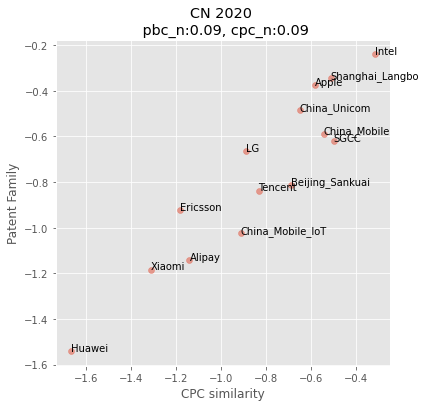

In [38]:
pbc_n=0.09
cpc_n=0.09
# c_df = scatter_plot(pbc_n,cpc_n)
# c_df = c_df.drop("Samsung Electronics Co Ltd")

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("CN 2020 \n pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("CPC similarity")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [39]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [40]:
competitor_ls

[4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 4, 4]

In [41]:
c_df

,cpc,country
company,,
Huawei Technologies,1.667583,1.539802
Apple,0.581880,0.373590
Shanghai_Langbo,0.512791,0.343405
Intel,0.315138,0.240767
China_Unicom,0.650356,0.483765
China_Mobile,0.544176,0.587665
SGCC,0.498800,0.620286
LG Electronics,0.889297,0.665837
Beijing_Sankuai,0.689649,0.810537


In [43]:
c_df.to_csv("competitor_df/company/cpc_cn_2020.csv")

In [41]:
# 公司名稱和類別
c_ls = list(c_df.index)

In [42]:
competitor_df = pd.DataFrame((zip(c_ls, competitor_ls)), columns = ['company', '2020_competitor'])

In [43]:
competitor_df

,company,2020_competitor
0,Huawei Technologies,4
1,Apple,2
2,Shanghai_Langbo,2
3,Intel,1
4,China_Unicom,4
5,China_Mobile,3
6,SGCC,3
7,LG Electronics,2
8,Beijing_Sankuai,3
9,Tencent Technology Shenzhen,3


In [44]:
competitor_df.to_csv("competitor_df/cpc_cn_2020.csv", index=False)

## US

In [44]:
ccontry = pd.read_csv("../rm_company_country_us_2020.csv")
ccpc = pd.read_csv("../rm_company_cpc_us_2020.csv")

In [45]:
ccontry[ccontry.company.isin(com_us_ls)]

,company,AR,AU,BG,BR,CA,CL,CN,CO,CZ,...,PL,PT,RU,SE,SG,TN,TR,TW,US,ZA
17,AT&T Intellectual Property I LP,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0,0.0
253,Cisco Technology Inc,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.0,0.0
372,EMC Corp,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0
533,Huawei Technologies Co Ltd,1.0,11.0,0.0,36.0,9.0,0.0,171.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,189.0,1.0
586,Intel Corp,0.0,1.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,386.0,0.0
592,International Business Machines Corp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227.0,0.0
668,LG Electronics Inc,0.0,3.0,0.0,1.0,2.0,0.0,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,299.0,0.0
765,Micron Technology Inc,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,154.0,0.0
766,Microsoft Technology Licensing LLC,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,0.0
848,Nokia Technologies Oy,1.0,5.0,0.0,0.0,1.0,0.0,32.0,1.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,6.0,62.0,1.0


### Similarity計算

#### Country

- 換成機率  

In [46]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

#### PBC
- 和Samsung Electronics Co Ltd比較

In [47]:
ccontry_pbc = ccontry2.loc[com_us_ls,:].copy()
ccontry_pbc.head()

,AR,AU,BG,BR,CA,CL,CN,CO,CZ,DE,...,PL,PT,RU,SE,SG,TN,TR,TW,US,ZA
company,,,,,,,,,,,,,,,,,,,,,
Qualcomm Inc,0.0,0.013764,0.0,0.010772,0.005386,0.000598,0.145123,0.001795,0.0,0.000000,...,0.0,0.0,0.000598,0.0,0.027528,0.000299,0.0,0.107720,0.559545,0.0
Samsung Electronics Co Ltd,0.0,0.002235,0.0,0.000000,0.000559,0.000000,0.175419,0.000000,0.0,0.019553,...,0.0,0.0,0.000000,0.0,0.002793,0.000000,0.0,0.007263,0.380447,0.0
Intel Corp,0.0,0.001832,0.0,0.000000,0.000000,0.000000,0.100733,0.000000,0.0,0.073260,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003663,0.706960,0.0
LG Electronics Inc,0.0,0.004769,0.0,0.001590,0.003180,0.000000,0.095390,0.000000,0.0,0.001590,...,0.0,0.0,0.000000,0.0,0.001590,0.000000,0.0,0.004769,0.475358,0.0
International Business Machines Corp,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.004310,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.978448,0.0


In [48]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

#### CPC

In [49]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [50]:
ccpc_pbc = ccpc2.loc[com_us_ls,:].copy()
# ccpc_pbc

In [51]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### Scatter Plot

In [52]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_us_df.count_log[com_us_df.company=="Samsung Electronics Co Ltd"].values-com_us_df.count_log[com_us_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_us_df.count_log[com_us_df.company=="Samsung Electronics Co Ltd"].values-com_us_df.count_log[com_us_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

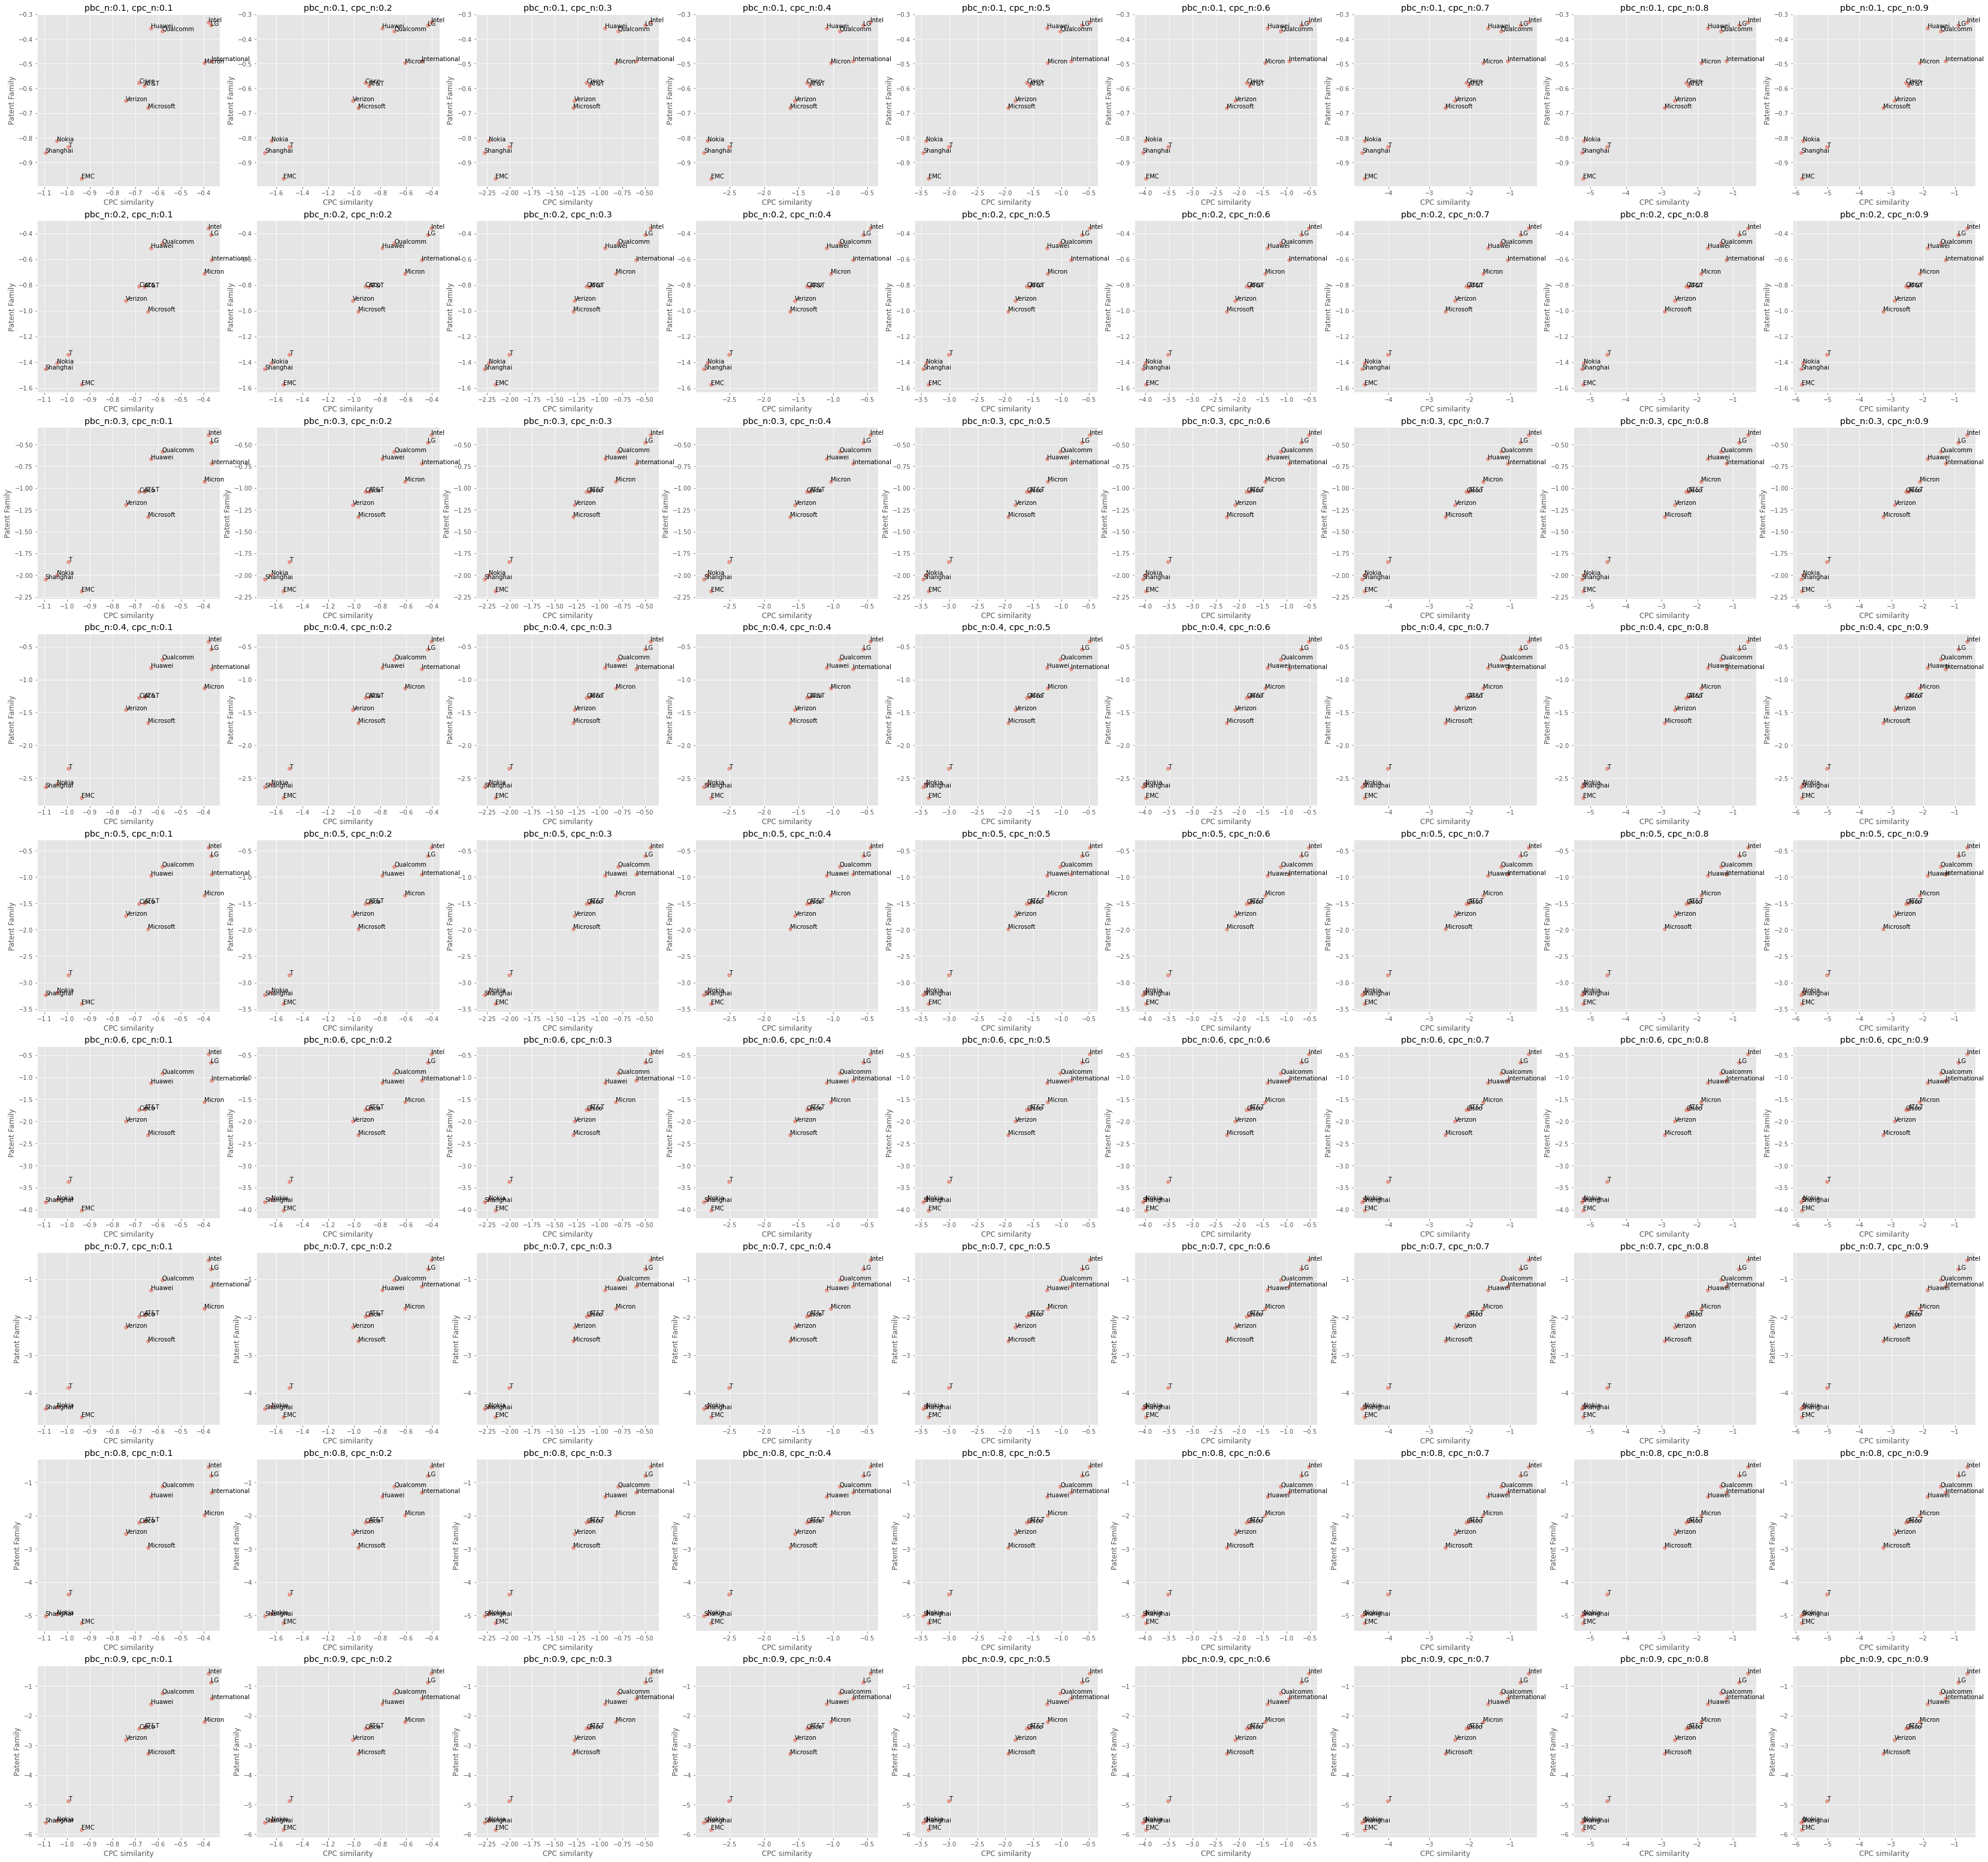

In [53]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_us_2020_1.png'.format(pbc_n))

In [54]:
c_df

,cpc,country
company,,
Qualcomm Inc,1.449969,1.235697
Intel Corp,0.607434,0.559730
LG Electronics Inc,0.890336,0.867424
International Business Machines Corp,1.295340,1.421247
Huawei Technologies Co Ltd,1.867156,1.591403
Micron Technology Inc,2.097872,2.198533
AT&T Intellectual Property I LP,2.471950,2.400014
Cisco Technology Inc,2.544320,2.438643
Verizon Patent and Licensing Inc,2.903064,2.810647


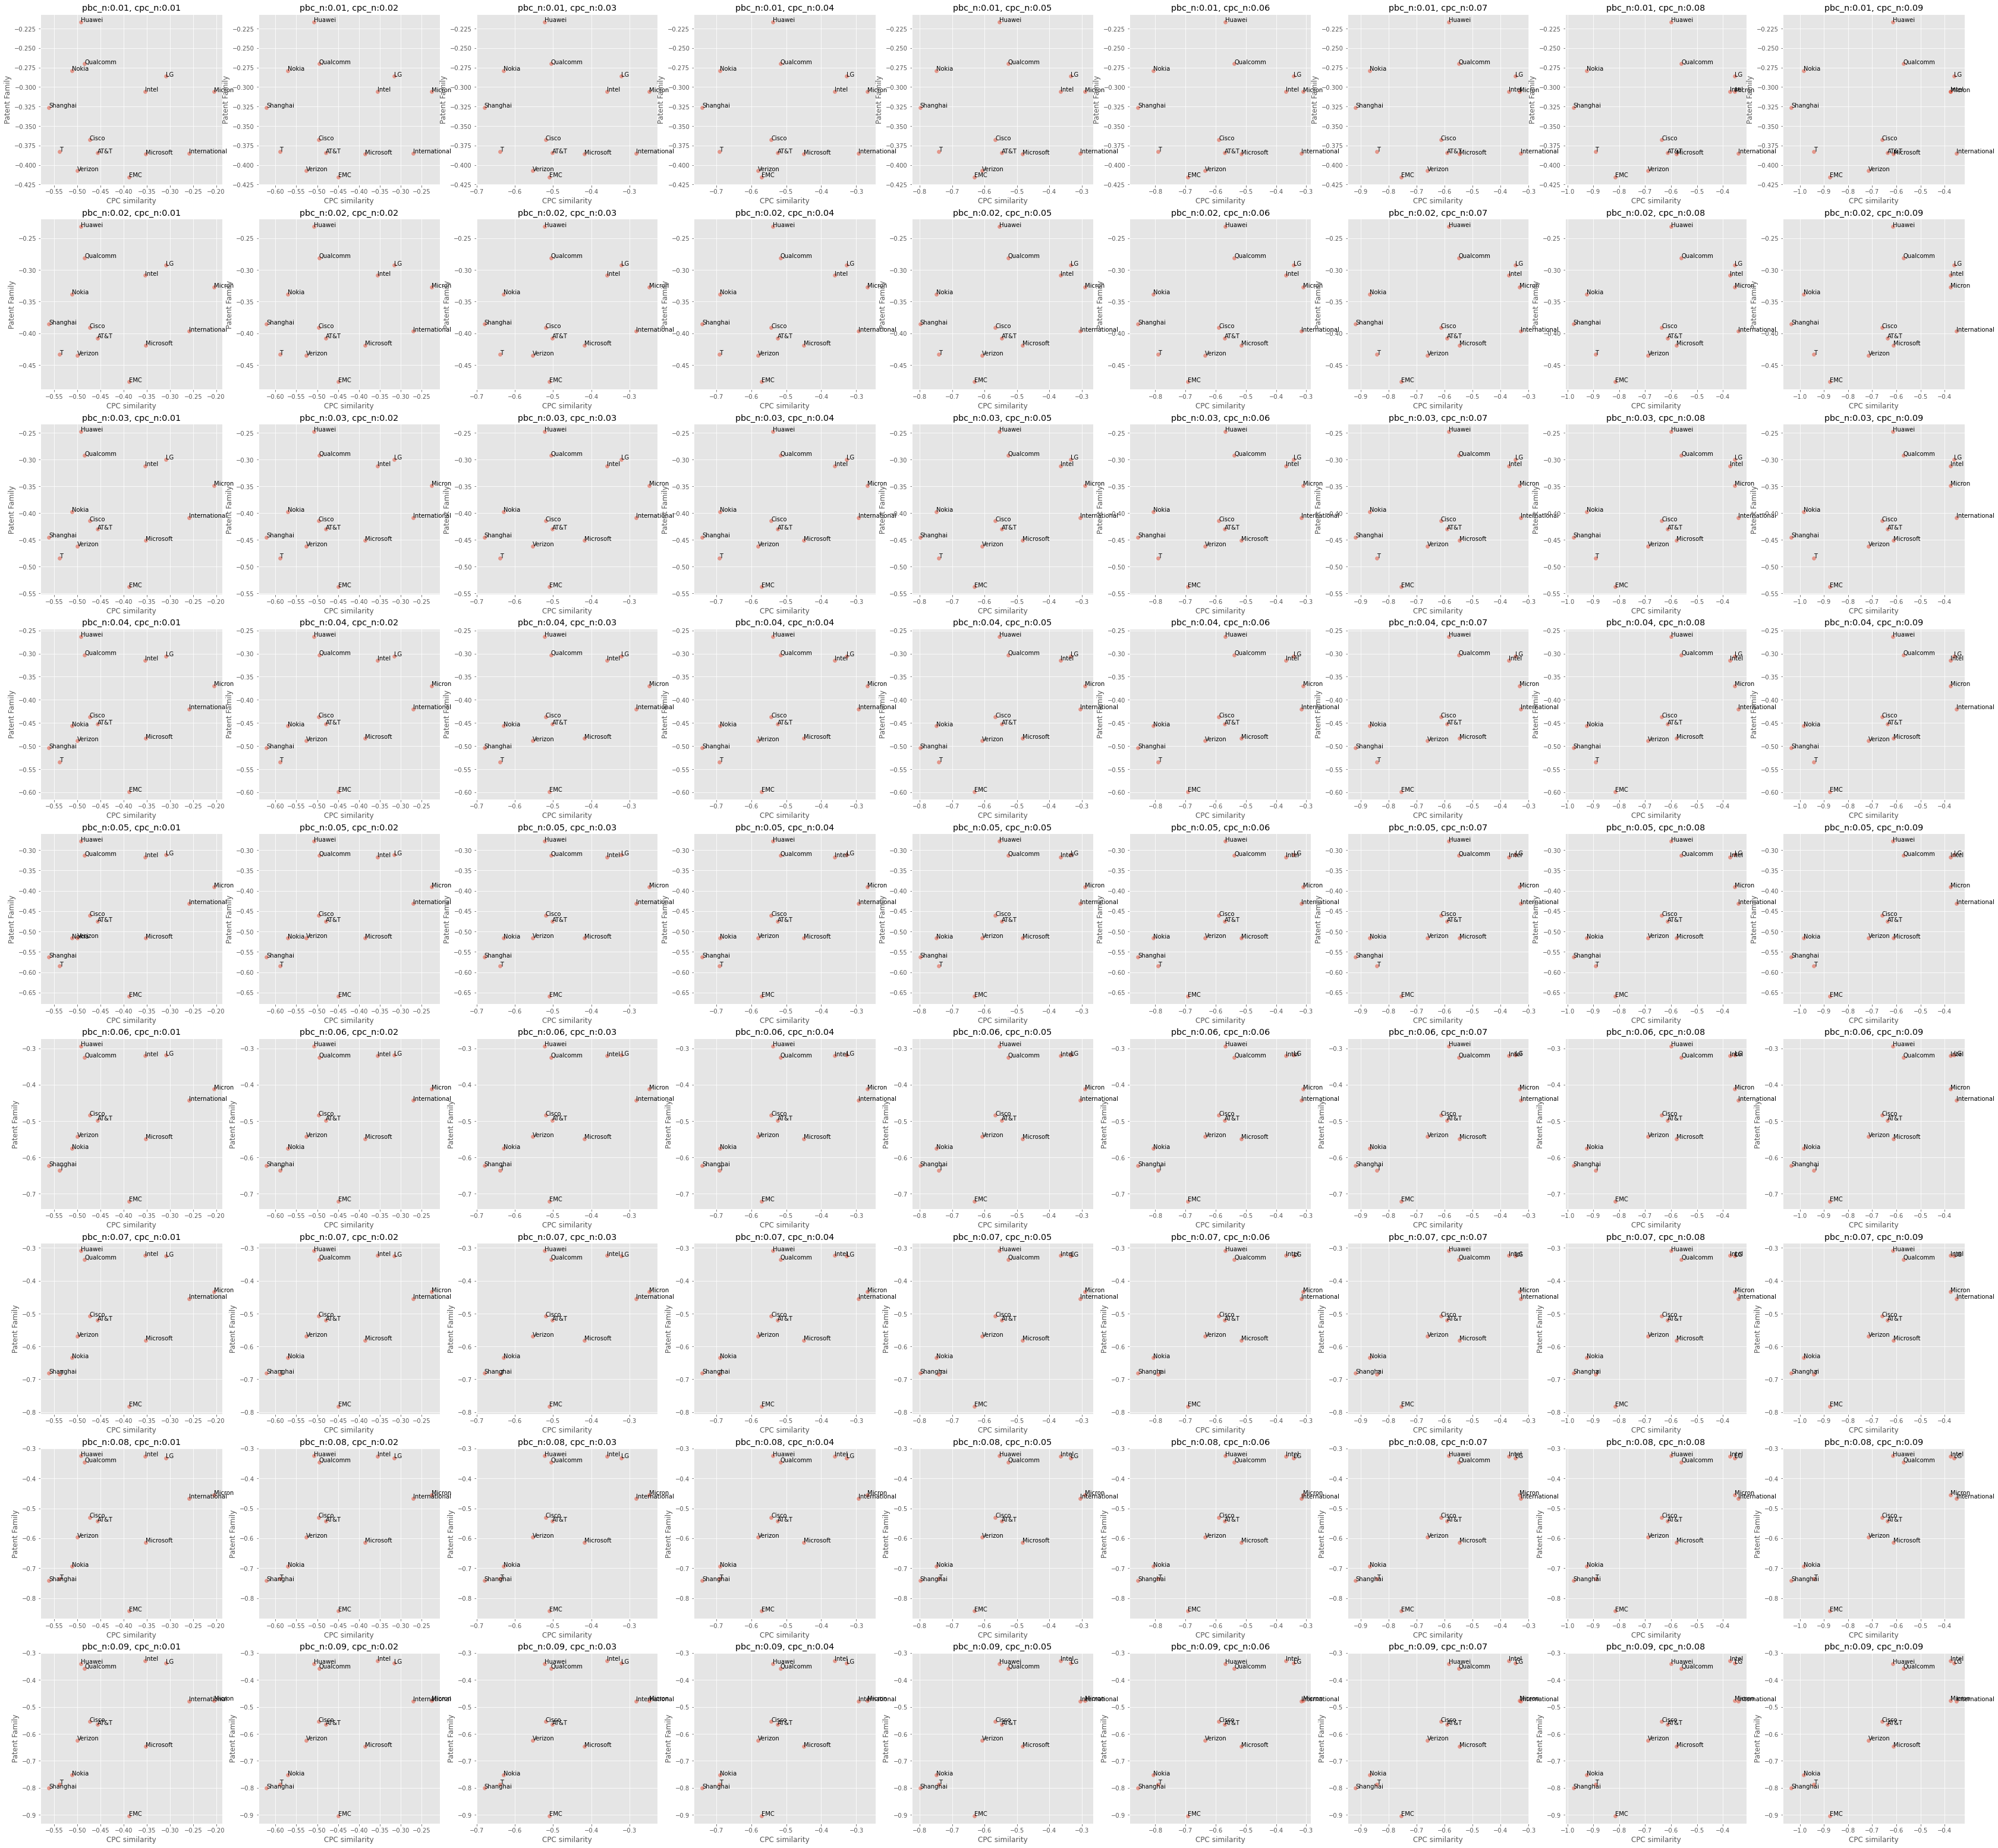

In [56]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_us_2020_2.png'.format(pbc_n))

In [57]:
c_df

,cpc,country
company,,
Qualcomm Inc,0.571122,0.356850
Intel Corp,0.376233,0.328528
LG Electronics Inc,0.361136,0.338225
International Business Machines Corp,0.352016,0.477923
Huawei Technologies Co Ltd,0.615682,0.339929
Micron Technology Inc,0.375264,0.475925
AT&T Intellectual Property I LP,0.637687,0.565751
Cisco Technology Inc,0.659446,0.553770
Verizon Patent and Licensing Inc,0.715884,0.623467


### Scatter Plot2

In [55]:
c_df = scatter_plot(pbc_n,cpc_n)
c_df = c_df.reset_index()
c_df["company"] = c_df.company.apply(lambda x: x.replace(" Inc","")\
                                                    .replace(" Co Ltd","")\
                                                    .replace(" Co. Ltd.","")\
                                                    .replace(" Co., Ltd.","")\
                                                    .replace(" Ltd","")\
                                                    .replace(" Corp","")\
                                                    .replace("..","")\
                                                    .replace("International Business Machines","IBM")\
                                                    .replace("Nippon Telegraph and Telephone","Nippon Telegraph & Tel")\
                                                    .replace("Alibaba Group Holding Ltd","Alibaba")\
                                                    .replace("ZTE Intelligent IoT Technology","ZTE")\
                                                    .replace("AT&T Intellectual Property I LP","AT&T")\
                                                    .replace("Microsoft Technology Licensing LLC","Microsoft")\
                                                    .replace("Telefonaktiebolaget LM Ericsson AB","Ericsson")\
                                                    .replace("Cisco Technology","Cisco Systems")\
                                                    .replace("Verizon Patent and Licensing","Verizon Communications")\
                                                    .replace("Nokia Technologies Oy","Nokia")\
                                                    .replace("China Mobile Communications Group","China Mobile")\
                                                    .replace("Nokia Solutions and Networks Oy","Nokia")\
                                                    .replace("China Mobile","China_Mobile")\
                                                    .replace("China Mobile IoT","China_Mobile_IoT")\
                                                    .replace("China United Network Communications Group","China_Unicom")\
                                                    .replace("Shanghai Langbo Communication Technology","Shanghai_Langbo")\
                                                    .replace("State Grid of China SGCC","SGCC")\
                                                    .replace("Beijing Sankuai Online Technology","Beijing_Sankuai")\
                                                    .replace("Beijing Xiaomi Mobile Software","Xiaomi")\
                                                    .replace("Guangdong Oppo Mobile Telecommunications","Oppo")\
                                                    .replace("Shanghai Roye Electric Science and Technology","Shanghai_Roye_Electric")\
                                                    .replace("Xian Irain IoT Technology Servic","Xian_Irain")\
                                                    .replace("China University of Geosciences","CUG")\
                                                    .replace("Shenzhen Shenglu IoT Communication Technology","Shenglu")\
                                                    .replace("Chengdu Qinchuan IoT Technology","Qinchuan_IoT")\
                                                    .replace("Hangzhou Wopu IoT Technology","Wopu_IoT")\
                                                    .replace("Huaway IoT Technology","Huaway_IoT")\
                                                    .replace("HUIZHOU TECHZEN IOT SCIENCE & TECHNOLOGY","HUIZHOU_TECHZEN_IOT")\
                                                    .replace("Anhui Sharetronic Iot Technology","Anhui_Sharetronic")\
                                                    .replace("Nanjing IoT Sensor Technology","Nanjing_IoT")\
                                                    .replace("SUZHOU XUANHE IOT TECHNOLOGY","SUZHOU_XUANHE_IOT")\
                                                    .replace("Jiangsu IoT Research and Development Center","Jiangsu_IoT")\
                                                    .replace("Shenzhen JBT Smart Lighting","JBT_Smart_Lighting")\
                                                    .replace("Shenzhen Mayixiongbing Iot Technology","Mayixiongbing_IoT")\
                                                    .replace("SHENZHEN QIANHAI LINGJU INTERNET OF THINGS SCIENCE & TECHNOLOGY","QIANHAI_LINGJU")\
                                                    .replace("Shenzhen Qianhai Livall IoT Technology","Livall")\
                                                    .replace("Nanjing Hansense Iot Technology","Hansense_IOT")\
                                                    .replace("GUANGDONG ABEJ IOT INTELLIGENT TECHNOLOGY","ABEJ_IOT")\
                                                    .replace("Tianjin Hui Zhiwulian Science And Technology","THZST")\
                                                    .replace("Chongqing Liuhe Iot","Chongqing_Liuhe_IOT")\
                                                    .replace("Huizhou Sanhe Iot Technology","Huizhou_Sanhe_IOT")\
                                                    .replace("T Mobile USA","T_Mobile_USA"))
c_df.set_index("company", inplace=True)
c_df = c_df.drop("Samsung Electronics")

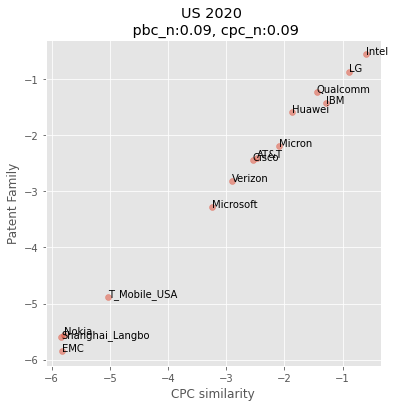

In [56]:
pbc_n=0.09
cpc_n=0.09
# c_df = scatter_plot(pbc_n,cpc_n)
# c_df = c_df.drop("Samsung Electronics Co Ltd")

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("US 2020 \n pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("CPC similarity")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [57]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [58]:
competitor_ls

[1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4]

In [59]:
c_df

,cpc,country
company,,
Qualcomm,1.449969,1.235697
Intel,0.607434,0.559730
LG Electronics,0.890336,0.867424
IBM,1.295340,1.421247
Huawei Technologies,1.867156,1.591403
Micron Technology,2.097872,2.198533
AT&T,2.471950,2.400014
Cisco Systems,2.544320,2.438643
Verizon Communications,2.903064,2.810647


In [60]:
c_df.to_csv("competitor_df/company/cpc_us_2020.csv")

In [63]:
# 公司名稱和類別
c_ls = list(c_df.index)

In [64]:
competitor_df = pd.DataFrame((zip(c_ls, competitor_ls)), columns = ['company', '2020_competitor'])

In [65]:
competitor_df

,company,2020_competitor
0,Qualcomm,1
1,Intel,1
2,LG Electronics,1
3,IBM,1
4,Huawei Technologies,1
5,Micron Technology,1
6,AT&T,1
7,Cisco Systems,1
8,Verizon Communications,4
9,Microsoft,3


In [66]:
competitor_df.to_csv("competitor_df/cpc_us_2020.csv", index=False)

## DE

In [61]:
ccontry = pd.read_csv("../rm_company_country_de_2020.csv")
ccpc = pd.read_csv("../rm_company_cpc_de_2020.csv")

In [62]:
ccontry[ccontry.company.isin(com_de_ls)]

,company,AT,BR,CH,CN,CZ,DE,EP,GB,JP,KR,LU,SG,TW,US
1,Apple Inc,0.0,0.0,0.0,3.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
29,Hewlett Packard Enterprise Development LP,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
32,Hyundai Mobis Co Ltd,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0
33,Hyundai Motor Co,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0
37,Intel Corp,0.0,2.0,0.0,33.0,0.0,85.0,0.0,0.0,9.0,12.0,0.0,0.0,6.0,44.0
39,Kia Corp,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0
42,LG Electronics Inc,0.0,0.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
56,Robert Bosch GmbH,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,Samsung Electronics Co Ltd,0.0,0.0,0.0,27.0,0.0,28.0,0.0,0.0,1.0,26.0,0.0,2.0,4.0,28.0
63,Siemens AG,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Similarity計算

#### Country

- 換成機率  

In [63]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

#### PBC
- 和Samsung Electronics Co Ltd比較

In [64]:
ccontry_pbc = ccontry2.loc[com_de_ls,:].copy()
ccontry_pbc.head()

,AT,BR,CH,CN,CZ,DE,EP,GB,JP,KR,LU,SG,TW,US
company,,,,,,,,,,,,,,
Intel Corp,0.0,0.010471,0.0,0.172775,0.0,0.445026,0.0,0.0,0.047120,0.062827,0.0,0.000000,0.031414,0.230366
Samsung Electronics Co Ltd,0.0,0.000000,0.0,0.232759,0.0,0.241379,0.0,0.0,0.008621,0.224138,0.0,0.017241,0.034483,0.241379
Robert Bosch GmbH,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Apple Inc,0.0,0.000000,0.0,0.300000,0.0,0.500000,0.0,0.1,0.000000,0.000000,0.0,0.000000,0.000000,0.100000
LG Electronics Inc,0.0,0.000000,0.0,0.222222,0.0,0.555556,0.0,0.0,0.000000,0.222222,0.0,0.000000,0.000000,0.000000


In [65]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

#### CPC

In [66]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [67]:
ccpc_pbc = ccpc2.loc[com_de_ls,:].copy()
# ccpc_pbc

In [68]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### Scatter Plot

In [69]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_de_df.count_log[com_de_df.company=="Samsung Electronics Co Ltd"].values-com_de_df.count_log[com_de_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_de_df.count_log[com_de_df.company=="Samsung Electronics Co Ltd"].values-com_de_df.count_log[com_de_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

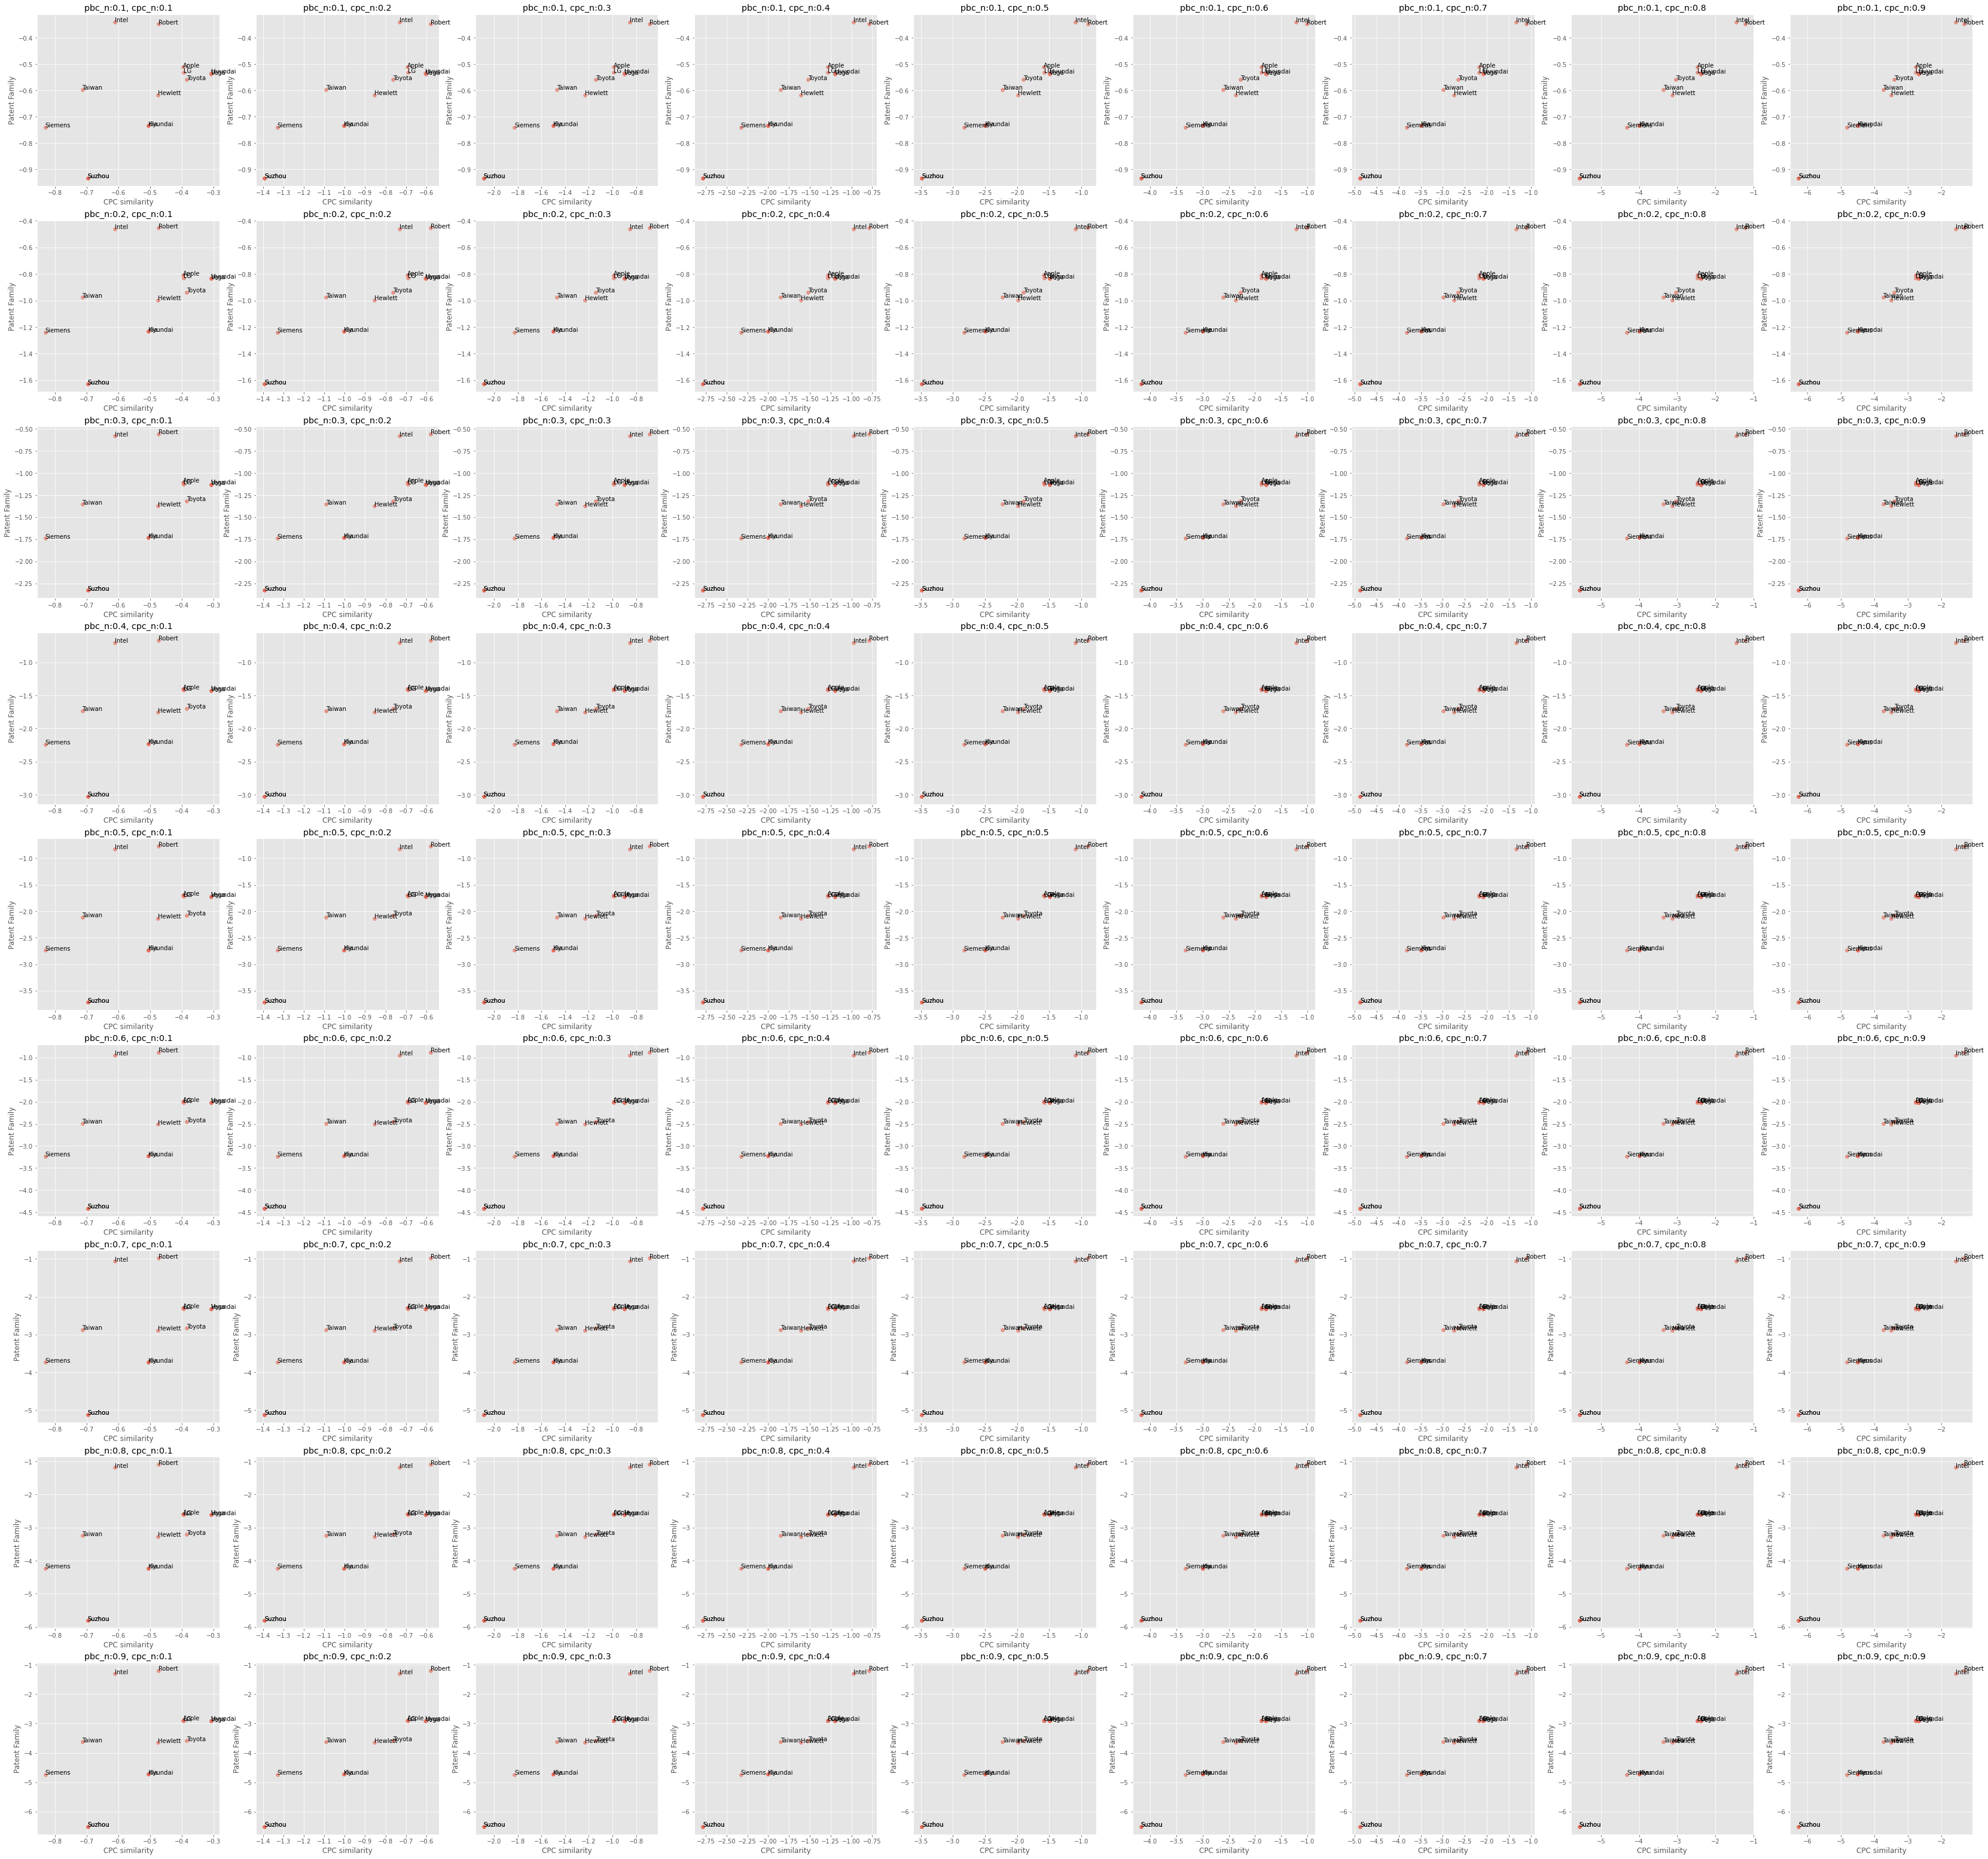

In [70]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_de_2020_1.png'.format(pbc_n))

In [71]:
c_df

,cpc,country
company,,
Intel Corp,1.576371,1.305066
Robert Bosch GmbH,1.321376,1.195484
Apple Inc,2.770203,2.885787
LG Electronics Inc,2.768467,2.906764
Hyundai Mobis Co Ltd,2.681581,2.907948
Vega Grieshaber KG,2.680702,2.912512
Hewlett Packard Enterprise Development LP,3.504101,3.646415
Taiwan Semiconductor Manufacturing Co TSMC Ltd,3.743823,3.625778
Toyota Motor Corp,3.414575,3.588944


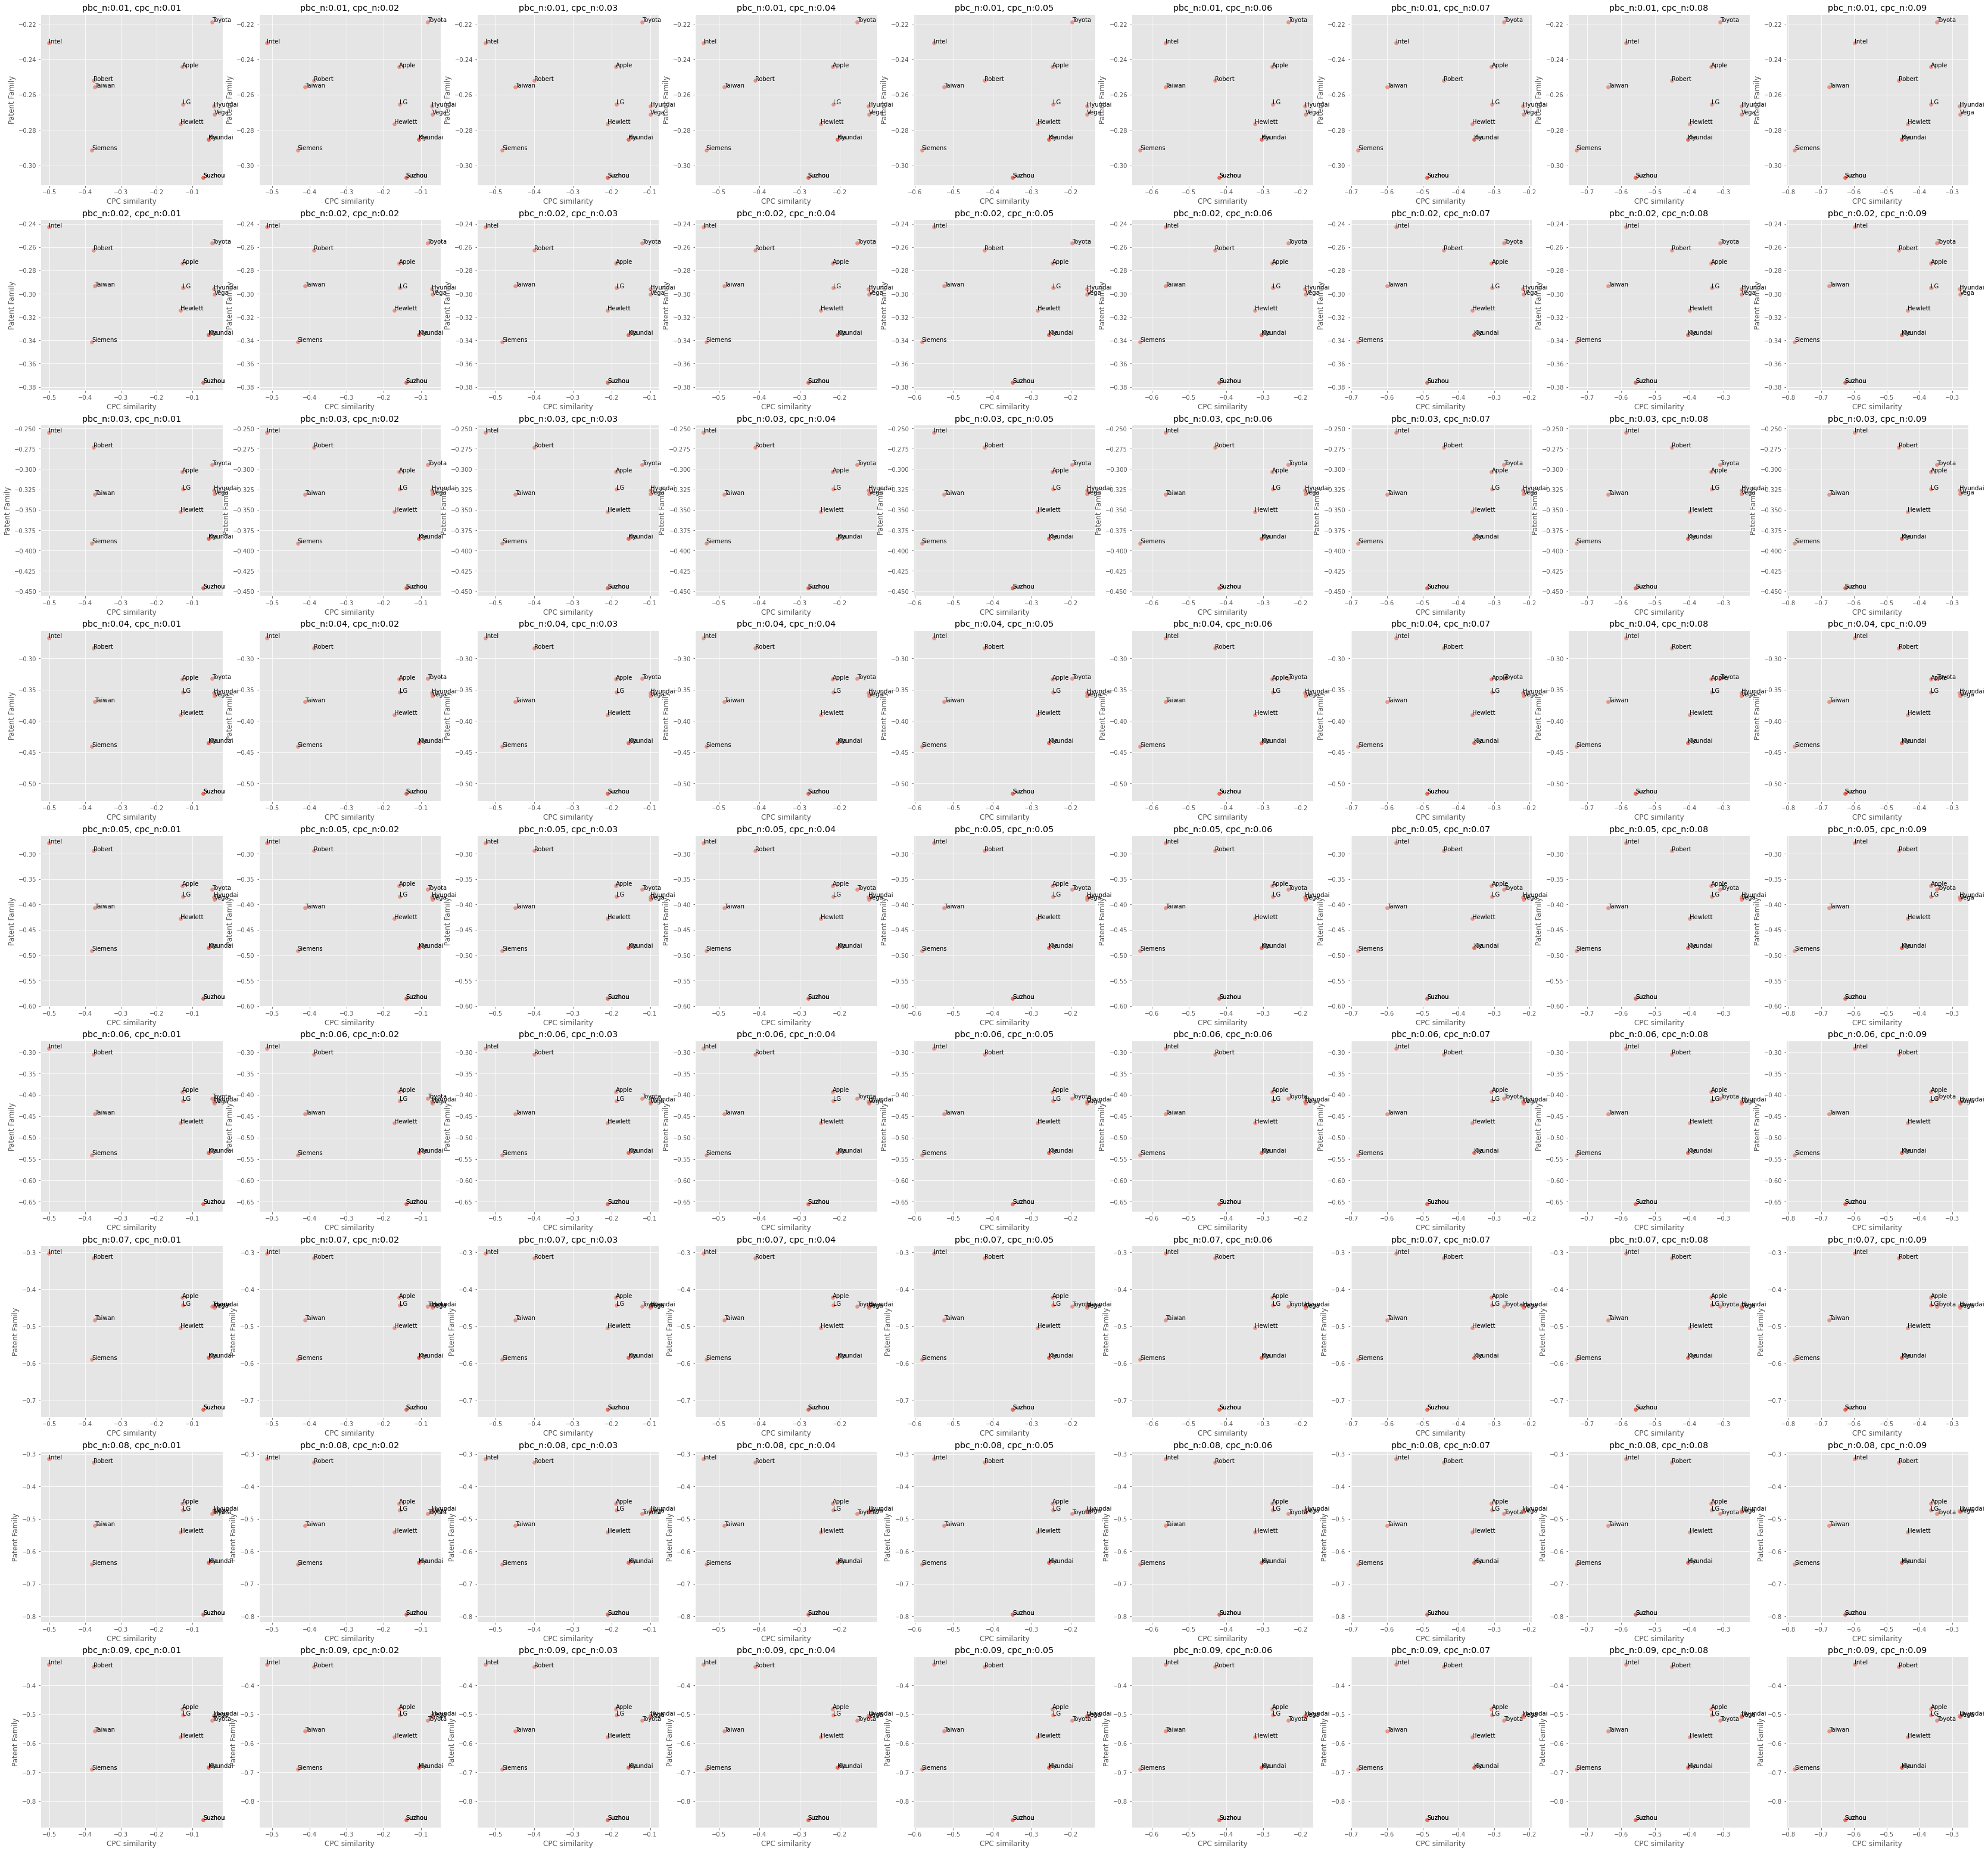

In [78]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_de_2020_2.png'.format(pbc_n))

In [79]:
c_df

,cpc,country
company,,
Intel Corp,0.598742,0.327437
Robert Bosch GmbH,0.462682,0.336790
Apple Inc,0.366184,0.481768
LG Electronics Inc,0.364448,0.502745
Hyundai Mobis Co Ltd,0.277562,0.503929
Vega Grieshaber KG,0.276683,0.508493
Hewlett Packard Enterprise Development LP,0.436982,0.579297
Taiwan Semiconductor Manufacturing Co TSMC Ltd,0.676704,0.558659
Toyota Motor Corp,0.347456,0.521825


### Scatter Plot2

In [72]:
c_df = scatter_plot(pbc_n,cpc_n)
c_df = c_df.reset_index()
c_df["company"] = c_df.company.apply(lambda x: x.replace(" Inc","")\
                                                    .replace(" Co Ltd","")\
                                                    .replace(" Co. Ltd.","")\
                                                    .replace(" Co., Ltd.","")\
                                                    .replace(" Ltd","")\
                                                    .replace(" Corp","")\
                                                    .replace("..","")\
                                                    .replace("International Business Machines","IBM")\
                                                    .replace("Nippon Telegraph and Telephone","Nippon Telegraph & Tel")\
                                                    .replace("Alibaba Group Holding Ltd","Alibaba")\
                                                    .replace("ZTE Intelligent IoT Technology","ZTE")\
                                                    .replace("AT&T Intellectual Property I LP","AT&T")\
                                                    .replace("Microsoft Technology Licensing LLC","Microsoft")\
                                                    .replace("Telefonaktiebolaget LM Ericsson AB","Ericsson")\
                                                    .replace("Cisco Technology","Cisco Systems")\
                                                    .replace("Verizon Patent and Licensing","Verizon Communications")\
                                                    .replace("Nokia Technologies Oy","Nokia")\
                                                    .replace("China Mobile Communications Group","China Mobile")\
                                                    .replace("Nokia Solutions and Networks Oy","Nokia")\
                                                    .replace("China Mobile","China_Mobile")\
                                                    .replace("China Mobile IoT","China_Mobile_IoT")\
                                                    .replace("China United Network Communications Group","China_Unicom")\
                                                    .replace("Shanghai Langbo Communication Technology","Shanghai_Langbo")\
                                                    .replace("State Grid of China SGCC","SGCC")\
                                                    .replace("Beijing Sankuai Online Technology","Beijing_Sankuai")\
                                                    .replace("Beijing Xiaomi Mobile Software","Xiaomi")\
                                                    .replace("Guangdong Oppo Mobile Telecommunications","Oppo")\
                                                    .replace("Shanghai Roye Electric Science and Technology","Shanghai_Roye_Electric")\
                                                    .replace("Xian Irain IoT Technology Servic","Xian_Irain")\
                                                    .replace("China University of Geosciences","CUG")\
                                                    .replace("Shenzhen Shenglu IoT Communication Technology","Shenglu")\
                                                    .replace("Chengdu Qinchuan IoT Technology","Qinchuan_IoT")\
                                                    .replace("Hangzhou Wopu IoT Technology","Wopu_IoT")\
                                                    .replace("Huaway IoT Technology","Huaway_IoT")\
                                                    .replace("HUIZHOU TECHZEN IOT SCIENCE & TECHNOLOGY","HUIZHOU_TECHZEN_IOT")\
                                                    .replace("Anhui Sharetronic Iot Technology","Anhui_Sharetronic")\
                                                    .replace("Nanjing IoT Sensor Technology","Nanjing_IoT")\
                                                    .replace("SUZHOU XUANHE IOT TECHNOLOGY","SUZHOU_XUANHE_IOT")\
                                                    .replace("Jiangsu IoT Research and Development Center","Jiangsu_IoT")\
                                                    .replace("Shenzhen JBT Smart Lighting","JBT_Smart_Lighting")\
                                                    .replace("Shenzhen Mayixiongbing Iot Technology","Mayixiongbing_IoT")\
                                                    .replace("SHENZHEN QIANHAI LINGJU INTERNET OF THINGS SCIENCE & TECHNOLOGY","QIANHAI_LINGJU")\
                                                    .replace("Shenzhen Qianhai Livall IoT Technology","Livall")\
                                                    .replace("Nanjing Hansense Iot Technology","Hansense_IOT")\
                                                    .replace("GUANGDONG ABEJ IOT INTELLIGENT TECHNOLOGY","ABEJ_IOT")\
                                                    .replace("Tianjin Hui Zhiwulian Science And Technology","THZST")\
                                                    .replace("Chongqing Liuhe Iot","Chongqing_Liuhe_IOT")\
                                                    .replace("Huizhou Sanhe Iot Technology","Huizhou_Sanhe_IOT")\
                                                    .replace("T Mobile USA","T_Mobile_deA")\
                                                    .replace("Taiwan Semiconductor Manufacturing Co TSMC","TSMC")\
                                                    .replace("Suzhou Jiang Zuomen Network Technology","Suzhou_JZ")\
                                                    .replace("Suzhou Jiang Zuomen Network Tech","Suzhou_JZ_net")\
                                                    .replace("Sony Group","Sony_Group")\
                                                    .replace("Sony Semiconductor Solutions","Sony_Semiconductor")\
                                                    .replace("Siemens Energy Global GmbH and Co KG","Siemens_Energy")\
                                                    .replace("Siemens Mobility GmbH","Siemens_Mobility")\
                                                    .replace("Bayerische Motoren Werke AG","BMW")\
                                                    .replace("Friedrich Alexander Univeritaet Erlangen Nuernberg FAU","FAU")\
                                                    .replace("Intel IP","Intel_IP"))
c_df.set_index("company", inplace=True)
c_df = c_df.drop("Samsung Electronics")

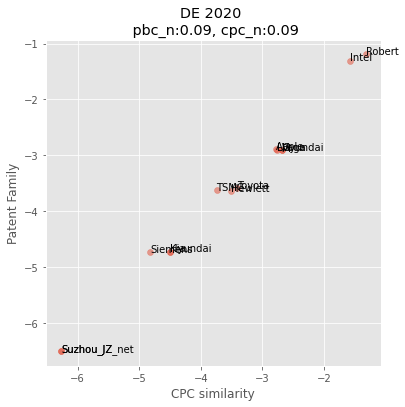

In [73]:
pbc_n=0.09
cpc_n=0.09
# c_df = scatter_plot(pbc_n,cpc_n)
# c_df = c_df.drop("Samsung Electronics Co Ltd")

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("DE 2020 \n pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("CPC similarity")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [74]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [75]:
competitor_ls

[1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4]

In [76]:
c_df

,cpc,country
company,,
Intel,1.576371,1.305066
Robert Bosch GmbH,1.321376,1.195484
Apple,2.770203,2.885787
LG Electronics,2.768467,2.906764
Hyundai Mobis,2.681581,2.907948
Vega Grieshaber KG,2.680702,2.912512
Hewlett Packard Enterprise Development LP,3.504101,3.646415
TSMC,3.743823,3.625778
Toyota Motor,3.414575,3.588944


In [77]:
c_df.to_csv("competitor_df/company/cpc_de_2020.csv")

In [85]:
# 公司名稱和類別
c_ls = list(c_df.index)

In [86]:
competitor_df = pd.DataFrame((zip(c_ls, competitor_ls)), columns = ['company', '2020_competitor'])

In [87]:
competitor_df

,company,2020_competitor
0,Intel,2
1,Robert Bosch GmbH,1
2,Apple,1
3,LG Electronics,1
4,Hyundai Mobis,1
5,Vega Grieshaber KG,1
6,Hewlett Packard Enterprise Development LP,1
7,TSMC,2
8,Toyota Motor,1
9,Hyundai Motor Co,3


In [88]:
competitor_df.to_csv("competitor_df/cpc_de_2020.csv", index=False)